# Data Transformation with Spark

## and

# Exploratory Analysis with Pandas

## Cleaning, Wrangling, Enriching and EDA of Adidas Sales Data in the US

In [69]:
#Imports
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType,DateType

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [82]:
#Definitions
spark = SparkSession.builder.master("local").appName("Adidas").getOrCreate()

In [71]:
spark

In [72]:
# Read the dataset and create a spark dataframe
df = spark.read.csv("Adidas_Sales.csv",header=True,inferSchema=True)

In [73]:
# Check a few rows the dataframe
df.show(5,False)

+-----------+-----------+------------+---------+--------+--------+-------------------------+--------------+----------+-----------+----------------+----------------+------------+
|Retailer   |Retailer ID|Invoice Date|Region   |State   |City    |Product                  |Price per Unit|Units Sold|Total Sales|Operating Profit|Operating Margin|Sales Method|
+-----------+-----------+------------+---------+--------+--------+-------------------------+--------------+----------+-----------+----------------+----------------+------------+
|Foot Locker|1185732    |1/1/2020    |Northeast|New York|New York|Men's Street Footwear    |$50.00        |1,200     |$600,000   |$300,000        |50%             |In-store    |
|Foot Locker|1185732    |1/2/2020    |Northeast|New York|New York|Men's Athletic Footwear  |$50.00        |1,000     |$500,000   |$150,000        |30%             |In-store    |
|Foot Locker|1185732    |1/3/2020    |Northeast|New York|New York|Women's Street Footwear  |$40.00        |1,0

In [74]:
# Check schema of the original dataframe
df.printSchema()

root
 |-- Retailer: string (nullable = true)
 |-- Retailer ID: integer (nullable = true)
 |-- Invoice Date: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Price per Unit: string (nullable = true)
 |-- Units Sold: string (nullable = true)
 |-- Total Sales: string (nullable = true)
 |-- Operating Profit: string (nullable = true)
 |-- Operating Margin: string (nullable = true)
 |-- Sales Method: string (nullable = true)



Transformations:
    Clean data,
    Change datatypes,
    Rename column,
    Enrich the dataset

In [75]:
# CLEANING DATA
df = (df\
            .withColumn("Invoice Date", regexp_replace(col("Invoice Date"),"/","-"))
            .withColumn("Units Sold", regexp_replace(col("Units Sold"),",",""))
            .withColumn("Price per Unit", regexp_replace(col("Price per Unit"),"\\$",""))
            .withColumn("Total Sales", regexp_replace(col("Total Sales"),"\\$",""))
            .withColumn("Total Sales", regexp_replace(col("Total Sales"),",",""))
            .withColumn("Operating Profit",regexp_replace(col("Operating Profit"),"\\$",""))
            .withColumn("Operating Profit",regexp_replace(col("Operating Profit"),",",""))
            .withColumn("Operating Margin", regexp_replace(col("Operating Margin"),"\\%",""))
           )

In [76]:
# check cleaned columns
df.select(col("Invoice Date"),col("Price per Unit"),col("Units Sold"),col("Total Sales"),col("Operating Profit"),col("Operating Margin")).show(5)

+------------+--------------+----------+-----------+----------------+----------------+
|Invoice Date|Price per Unit|Units Sold|Total Sales|Operating Profit|Operating Margin|
+------------+--------------+----------+-----------+----------------+----------------+
|    1-1-2020|        50.00 |      1200|    600000 |         300000 |              50|
|    1-2-2020|        50.00 |      1000|    500000 |         150000 |              30|
|    1-3-2020|        40.00 |      1000|    400000 |         140000 |              35|
|    1-4-2020|        45.00 |       850|    382500 |         133875 |              35|
|    1-5-2020|        60.00 |       900|    540000 |         162000 |              30|
+------------+--------------+----------+-----------+----------------+----------------+
only showing top 5 rows



In [47]:
# CHANGE DATATYPES
df = (df\
      .withColumn("Retailer",df["Retailer"].cast("string"))
      .withColumn("Invoice Date",df["Invoice Date"].cast('date'))
      .withColumn("Region",df["Region"].cast("string"))
      .withColumn("State",df["State"].cast("string"))
      .withColumn("City",df["City"].cast("string"))
      .withColumn("Product",df["Product"].cast("string"))
      .withColumn("Price per Unit",df["Price per Unit"].cast("float"))
      .withColumn("Units Sold",df["Units Sold"].cast("integer"))
      .withColumn("Total Sales",df["Total Sales"].cast("float"))
      .withColumn("Operating Profit",df["Operating Profit"].cast("float"))
      .withColumn("Operating Margin",df["Operating Margin"].cast("integer"))
      .withColumn("Sales Method",df["Sales Method"].cast("string"))
     )

In [78]:
# check new updated schema
df.printSchema()

root
 |-- Retailer: string (nullable = true)
 |-- Retailer ID: integer (nullable = true)
 |-- Invoice Date: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Price per Unit: string (nullable = true)
 |-- Units Sold: string (nullable = true)
 |-- Total Sales: string (nullable = true)
 |-- Operating Profit: string (nullable = true)
 |-- Operating Margin: string (nullable = true)
 |-- Sales Method: string (nullable = true)



In [79]:
# RENAME COLUMNS
df = (df\
      .withColumnRenamed("Retailer ID", "RetailerID")
      .withColumnRenamed("Invoice Date","InvoiceDate")
      .withColumnRenamed("Price per Unit","UnitPrice")
      .withColumnRenamed("Units Sold","Quantity")
      .withColumnRenamed("Total Sales","Sales")
      .withColumnRenamed("Operating Profit","Profit")
      .withColumnRenamed("Operating Margin","PercentMargin")
      .withColumnRenamed("Sales Method","Channel")
     )

In [80]:
# Check renamed columns
df.select(col("RetailerID"),col("InvoiceDate"),col("UnitPrice"),col("Quantity"),col("Sales"),col("Profit"),col("PercentMargin"),col("Channel")).show(5)

+----------+-----------+---------+--------+-------+-------+-------------+--------+
|RetailerID|InvoiceDate|UnitPrice|Quantity|  Sales| Profit|PercentMargin| Channel|
+----------+-----------+---------+--------+-------+-------+-------------+--------+
|   1185732|   1-1-2020|   50.00 |    1200|600000 |300000 |           50|In-store|
|   1185732|   1-2-2020|   50.00 |    1000|500000 |150000 |           30|In-store|
|   1185732|   1-3-2020|   40.00 |    1000|400000 |140000 |           35|In-store|
|   1185732|   1-4-2020|   45.00 |     850|382500 |133875 |           35|In-store|
|   1185732|   1-5-2020|   60.00 |     900|540000 |162000 |           30|In-store|
+----------+-----------+---------+--------+-------+-------+-------------+--------+
only showing top 5 rows



In [52]:
# ENRICH THE DATASET
df = df\
    .withColumn("Margin", col("UnitPrice") * (col("PercentMargin")/100).cast("float"))\
    .withColumn("Cost", col("UnitPrice")-col("Margin"))

In [53]:
#check new columns
df.select(col("UnitPrice"),col("Profit"),col("PercentMargin"),col("Margin"),col("Cost")).show(5)

+---------+--------+-------------+---------+-----+
|UnitPrice|  Profit|PercentMargin|   Margin| Cost|
+---------+--------+-------------+---------+-----+
|     50.0|300000.0|           50|     25.0| 25.0|
|     50.0|150000.0|           30|15.000001| 35.0|
|     40.0|140000.0|           35|     14.0| 26.0|
|     45.0|133875.0|           35|    15.75|29.25|
|     60.0|162000.0|           30|     18.0| 42.0|
+---------+--------+-------------+---------+-----+
only showing top 5 rows



In [54]:
# Meditation & Inference
# Sales should be a product of quantity and unitprice
        ## however, there is an issue with quantity values
# The original dataset has failed to explain this discrepancy.
        ## the issue can be sorted by getting the original sales data from adidas sales registry.

#### Exploratory Data Analysis

In [55]:
# Convert the spark dataframe to pandas dataframe
pd_df = df.toPandas()

###### 1. Total Sales by Product

In [56]:
# Get sales
top_products = pd_df.groupby("Product")["Sales"].sum().sort_values(ascending=False).reset_index()
top_products.index+=1
top_products

,Product,Sales
1,Men's Street Footwear,208826240.0
2,Women's Apparel,179038864.0
3,Men's Athletic Footwear,153673680.0
4,Women's Street Footwear,128002816.0
5,Men's Apparel,123728632.0
6,Women's Athletic Footwear,106631896.0


Text(0.5, 1.0, 'Total Sales by Product')

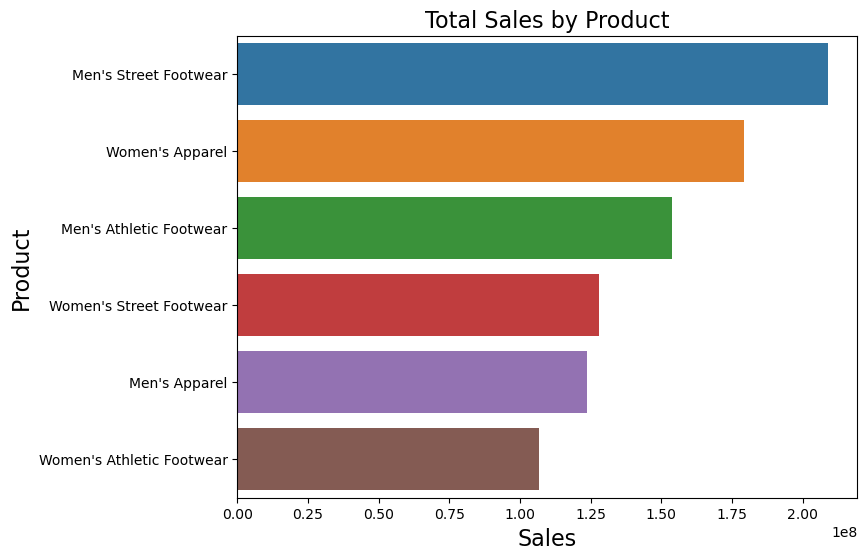

In [57]:
# Plot the barchat
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Sales",y="Product",  data=top_products)
ax.set_xlabel("Sales", fontsize = 16)
ax.set_ylabel("Product", fontsize = 16)
ax.set_title("Total Sales by Product", fontsize = 16)


###### 2. Sales by Retailers

In [58]:
retailer_sales = pd_df.groupby("Retailer")["Profit"].sum().sort_values(ascending=False).reset_index()
retailer_sales.index+=1
retailer_sales

,Retailer,Profit
1,West Gear,85667968.0
2,Foot Locker,80722232.0
3,Sports Direct,74333024.0
4,Kohl's,36811304.0
5,Amazon,28818532.0
6,Walmart,25782064.0


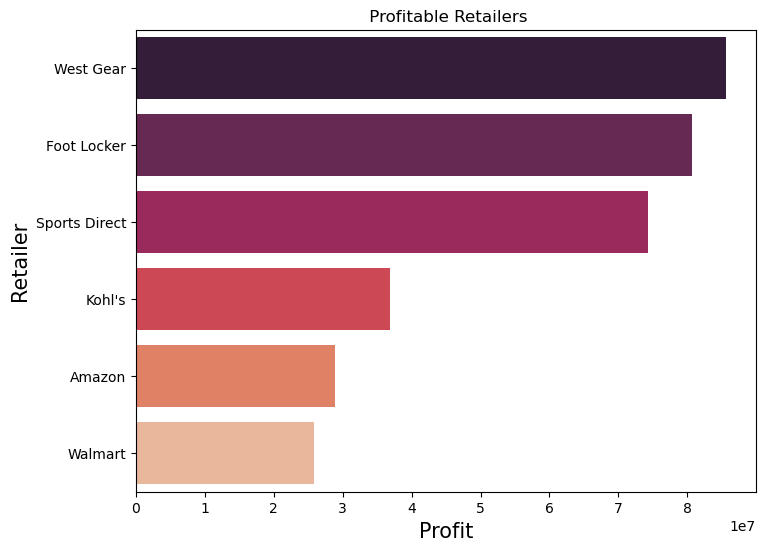

In [59]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data=retailer_sales,x="Profit",y="Retailer", palette="rocket")
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 10)
ax.set_xlabel("Profit", fontsize = 15)
ax.set_ylabel("Retailer", fontsize = 15)
ax.set_title(" Profitable Retailers")
plt.show()

###### 3.Performance by Regions

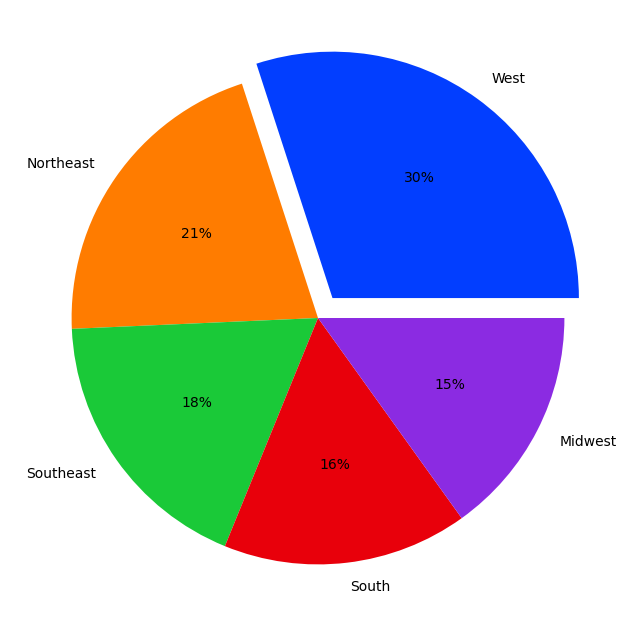

In [60]:
# Plot a pie chart to showcase performance by region
performing_region = pd_df.groupby("Region")["Sales"].sum().sort_values(ascending=False).reset_index()
data = list(performing_region["Sales"])
labels = list(performing_region["Region"])
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("bright")[:5]
plt.pie(data, labels = labels, colors = colors, autopct="%.0f%%", explode = (0.1, 0,0,0,0))
plt.show()

###### 4.Most Profitable Products

In [61]:
# Get Products
prof_products = pd_df.groupby("Product")["Profit"].sum().sort_values(ascending=False).reset_index()
prof_products.index+=1
prof_products

,Product,Profit
1,Men's Street Footwear,82802320.0
2,Women's Apparel,68650992.0
3,Men's Athletic Footwear,51846964.0
4,Women's Street Footwear,45095896.0
5,Men's Apparel,44763100.0
6,Women's Athletic Footwear,38975844.0


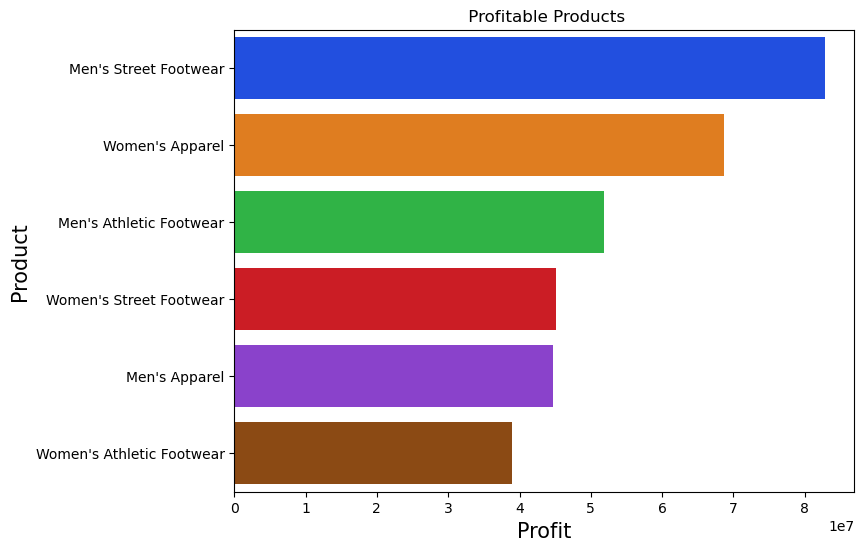

In [64]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data=prof_products,x="Profit",y="Product", palette="bright")
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 10)
ax.set_xlabel("Profit", fontsize = 15)
ax.set_ylabel("Product", fontsize = 15)
ax.set_title(" Profitable Products")
plt.show()

###### 5. Sales Channel Comparison

In [66]:
px.pie(names=pd_df.groupby("Channel")["Sales"].sum().index,
       values=pd_df.groupby("Channel")["Sales"].sum().values,
       title="Sales Distribution by Channel")
